In [1]:
# 決定木

In [2]:
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython
import sklearn
from sklearn.model_selection import train_test_split
import mglearn
import graphviz
%matplotlib inline

/anaconda3/envs/titanic/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/anaconda3/envs/titanic/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


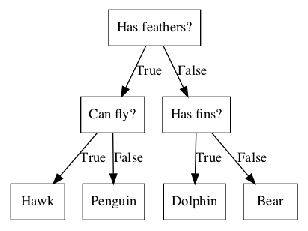

In [3]:
mglearn.plots.plot_animal_tree()

In [4]:
# 事前枝刈り

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(
    cancer.data , cancer.target , stratify=cancer.target , random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
display(tree.score(X_train,y_train))
display(tree.score(X_test,y_test))

1.0

0.9370629370629371

In [6]:
tree = DecisionTreeClassifier(max_depth=4 , random_state= 0)
tree.fit(X_train,y_train)

display(tree.score(X_train,y_train))
display(tree.score(X_test,y_test))

0.9882629107981221

0.951048951048951

In [7]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file="tree.dot",class_names=["malignant","benign"],feature_names=cancer.feature_names,impurity=False,filled=True)

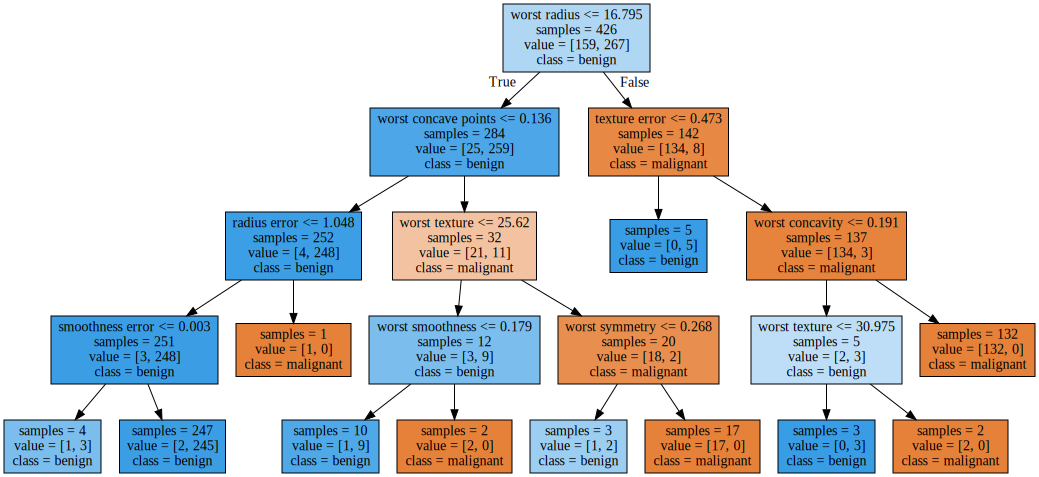

In [8]:
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [9]:
# 特徴量の重要度

In [10]:
print("Feature Importances:\n{}".format(tree.feature_importances_))

Feature Importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


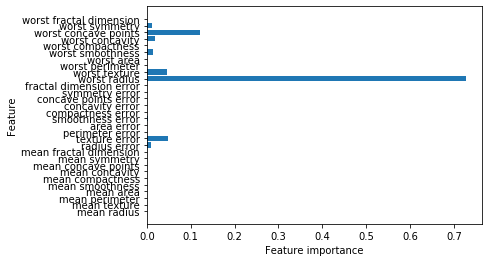

In [11]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_ , align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


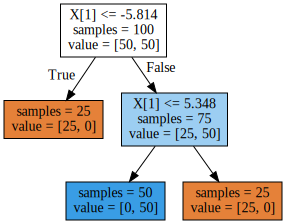

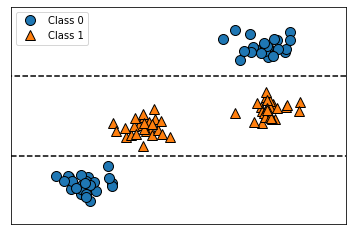

In [12]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)


Text(0, 0.5, 'Price in $/Mbyte')

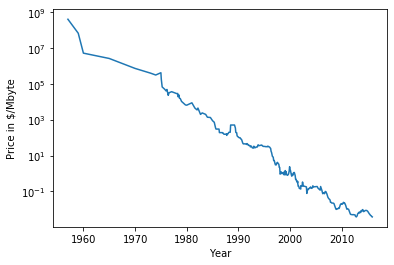

In [13]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,"ram_price.csv"))

plt.semilogy(ram_prices.date,ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

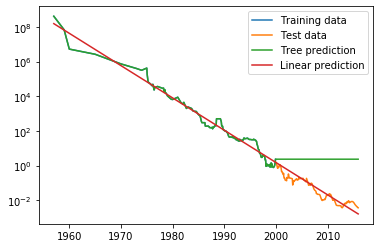

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date[:,np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train,y_train)


X_all = ram_prices.date[:,np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

plt.semilogy(data_train.date, data_train.price , label="Training data")
plt.semilogy(data_test.date, data_test.price , label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr , label="Linear prediction")
plt.legend()


In [15]:
# ランダムフォレスト

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X , y = make_moons(n_samples=100 , noise=0.25 , random_state= 3)
X_train , X_test , y_train , y_test = train_test_split(X,y,stratify = y,random_state=42)

forest = RandomForestClassifier(n_estimators=5 , random_state=2)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

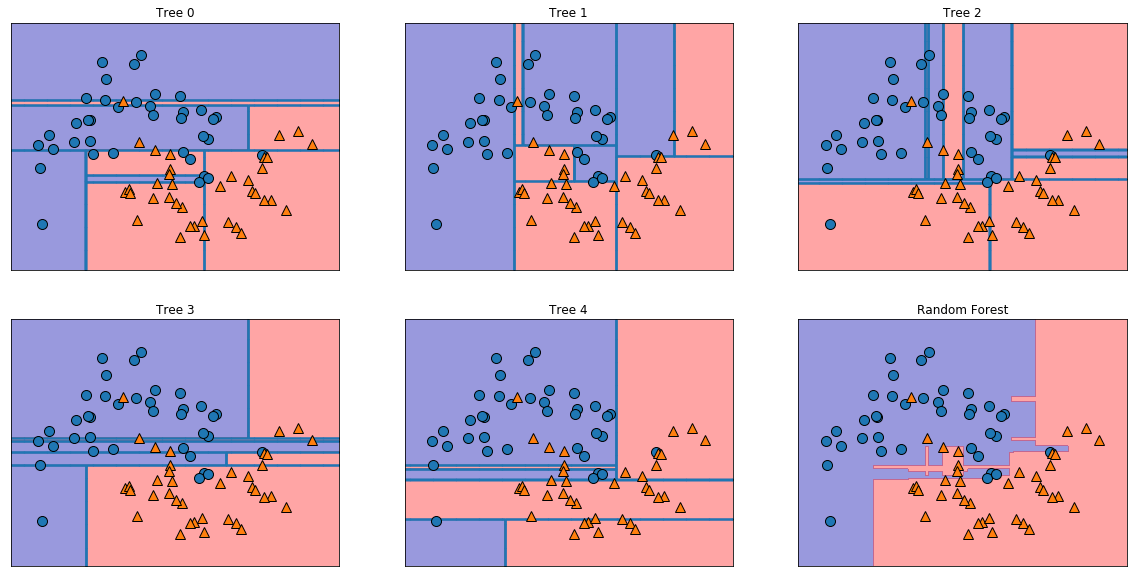

In [17]:
fig , axes = plt.subplots(2,3,figsize=(20,10))
for i , (ax, tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train,y_train,tree,ax=ax)

mglearn.plots.plot_2d_separator(forest,X_train,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)


In [18]:
X_train , X_test , y_train , y_test = train_test_split(cancer.data , cancer.target , random_state=0)
forest = RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)

print("Accuracy on training set : {:.3f}".format(forest.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test,y_test)))

Accuracy on training set : 1.000
Accuracy on test set: 0.972


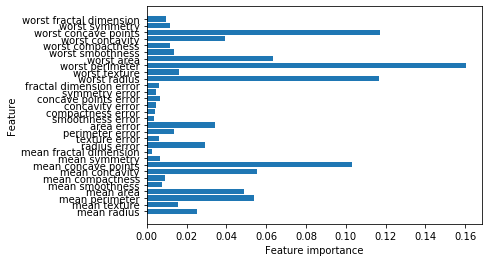

In [19]:
plot_feature_importances_cancer(forest)

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

X_train , X_test , y_train , y_test = train_test_split(cancer.data , cancer.target , random_state = 0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test,y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


In [21]:
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test,y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [22]:
gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gbrt.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test,y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


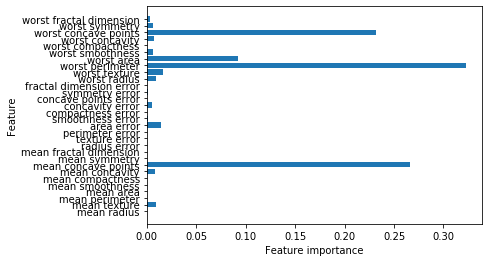

In [23]:
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)

plot_feature_importances_cancer(gbrt)

In [24]:
# 線形モデルと非線形特徴量

Text(0, 0.5, 'Feature 1')

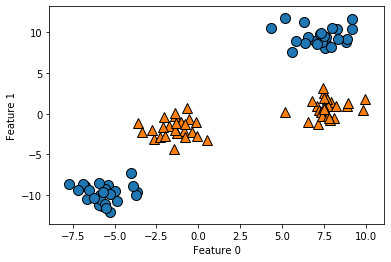

In [25]:
from sklearn.datasets import make_blobs

X,y = make_blobs(centers=4,random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/anaconda3/envs/titanic/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Feature 1')

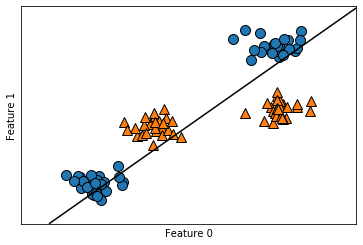

In [26]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X,y)
mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

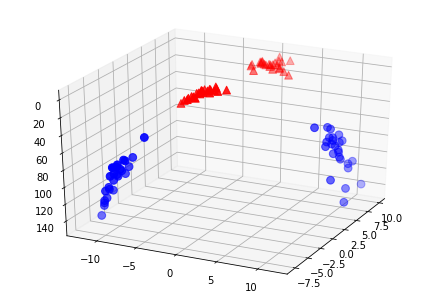

In [27]:
# 2番目の特徴量の2乗を追加
X_new = np.hstack([X,X[:,1:]**2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3Dで可視化

ax = Axes3D(figure , elev=-152 , azim=-26)
# y == 0の点をプロットしてから y==1の点をプロット
mask = y == 0
ax.scatter(X_new[mask,0] , X_new[mask,1] , X_new[mask,2],c='b',cmap=mglearn.cm2,s=60)
ax.scatter(X_new[~mask,0] , X_new[~mask,1] , X_new[~mask,2],c='r',marker='^',cmap=mglearn.cm2,s=60)
ax.set_xlabel=("feature 0")
ax.set_ylabel=("feature 1")
ax.set_zlabel=("feature1 ** 2")



/anaconda3/envs/titanic/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature1 ** 2')

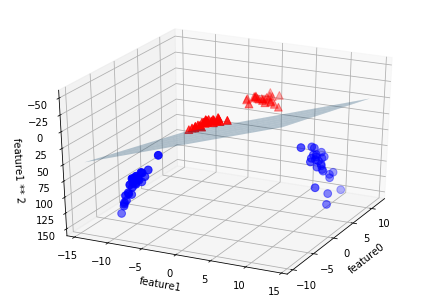

In [28]:
linear_svm_3d = LinearSVC().fit(X_new,y)
coef , intercept = linear_svm_3d.coef_.ravel() , linear_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure , elev=-152 , azim=-26)
xx = np.linspace(X_new[:,0].min() - 2 , X_new[:,0].max() + 2 , 50)
yy = np.linspace(X_new[:,1].min() - 2 , X_new[:,1].max() + 2 , 50)
XX,YY = np.meshgrid(xx,yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX , YY , ZZ , rstride = 8 , cstride = 8 , alpha = 0.3)
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',cmap=mglearn.cm2,s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',cmap=mglearn.cm2,s=60)

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

Text(0, 0.5, 'Feature1')

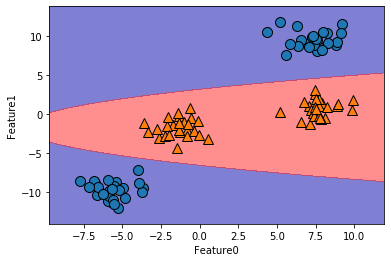

In [29]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()])
plt.contourf(XX,YY,dec.reshape(XX.shape),levels=[dec.min(),0,dec.max()],cmap=mglearn.cm2,alpha=0.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature0")
plt.ylabel("Feature1")

Text(0, 0.5, 'Feature 1')

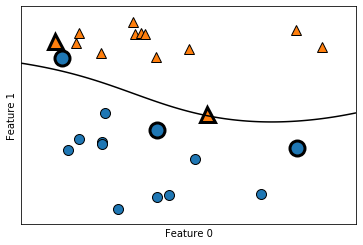

In [30]:
from sklearn.svm import SVC
X,y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf',C=10,gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm,X,eps=.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
# サポートベクタをプロットする
sv = svm.support_vectors_
# サポートベクタのクラスラベルはdual_coef_の正負によって与えられる
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=15,markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")



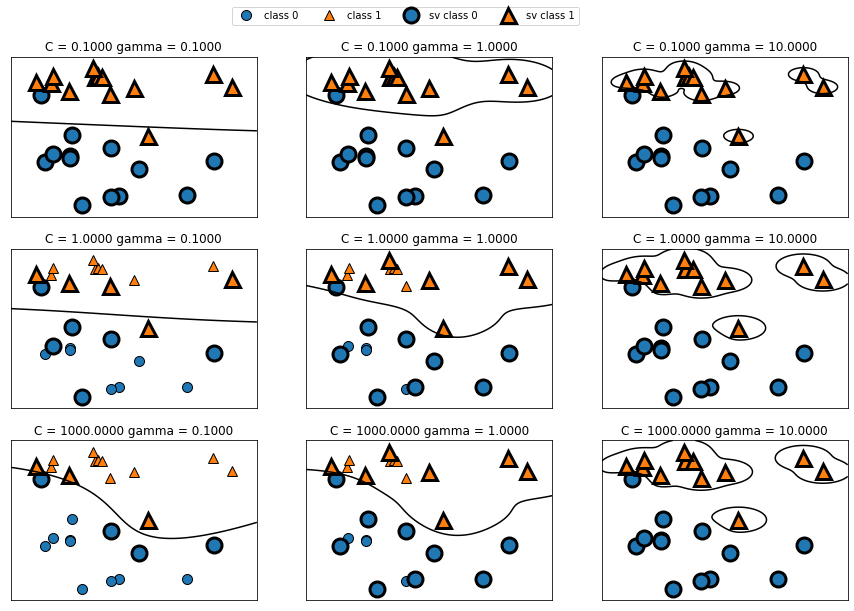

In [31]:
fig,axes = plt.subplots(3,3,figsize=(15,10))

for ax,C in zip(axes ,[-1,0,3]):
    for a, gamma in zip(ax,range(-1,2)):
        mglearn.plots.plot_svm(log_C=C,log_gamma=gamma,ax=a)

axes[0,0].legend(["class 0","class 1","sv class 0","sv class 1"],ncol=4,loc=(.9,1.2))


In [32]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)

svc = SVC()
svc.fit(X_train,y_train)

display(svc.score(X_train,y_train))
display(svc.score(X_test,y_test))


/anaconda3/envs/titanic/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


1.0

0.6293706293706294

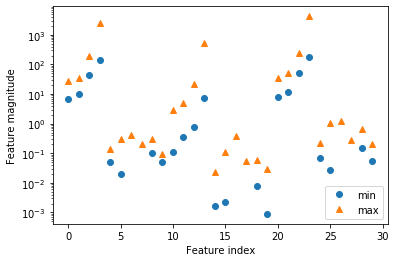

In [33]:
plt.plot(X_train.min(axis=0),'o',label="min")
plt.plot(X_train.max(axis=0),'^',label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

In [34]:
# 訓練セットごとの特徴量ごとに最小値を計算
min_on_training = X_train.min(axis=0)
# 訓練セットの特徴量ごとにレンジ(最大値-最小値)を計算
range_on_training = (X_train - min_on_training).max(axis=0)

# 最小値を引いてレンジで割る
# 個々の特徴量はmin=0,max=1となる
X_train_scaled = (X_train - min_on_training) / range_on_training
display(X_train_scaled.min(axis=0))
display(X_train_scaled.max(axis=0))


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [36]:
# テストセットにも同じ変換をする
X_test_scaled = (X_test - min_on_training) / range_on_training

svc = SVC()
svc.fit(X_train_scaled,y_train)

display(svc.score(X_train_scaled,y_train))
display(svc.score(X_test_scaled,y_test))



/anaconda3/envs/titanic/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9483568075117371

0.951048951048951

In [37]:
svc = SVC(C=1000)
svc.fit(X_train_scaled,y_train)
display(svc.score(X_train_scaled,y_train))
display(svc.score(X_test_scaled,y_test))

/anaconda3/envs/titanic/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9882629107981221

0.972027972027972